<center>
<h1 style="margin:0;"><b>'REVISITING LOTKA-VOLTERRA: EXPANDING PREDATOR-PREY DYNAMICS TO MULTI-SPECIES SYSTEM'</b></h1>
<h5>Raffaele Simbari</h5>

### INTRODUCTION

In this project, we extend the classical Lotka-Volterra model by revisiting and adapting it to handle more complex, real-world scenarios involving multiple species. The primary objective is to simulate predator-prey interactions in a multi-species environment, first with two species (a predator and a prey) and then with three species (introducing a third species to interact with both the predator and the prey). This approach allows for a more comprehensive understanding of ecological stability and species coexistence in ecosystems with more intricate food webs.

### LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### SOLVERS

In [2]:
#EULER METHOD
def Euler(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i):
    
    #We create two np.array containing our starting points x0 and t0
    xvals = np.array([x0])
    tvals = np.array([t0])
    xn = x0
    tn = t0
    while tn<tmax:
        #We update the value of xn and tn at each iteration
        xn = xn + dt*f(xn,tn, a , b, c, d, e, fi, g, h, i)
        tn = tn + dt
        #We interrupt the for loop when tn > tmax
        if tn > tmax:
            break
        #At each iteration we concatenate an array containing the updated values of xn in xvals
        #and an array containing the updated value of tn in tvals.
        #xvals and tvals will be arrays of multiple arrays.
        #Each array in xvals contain the current values of x0 at each variation of time.
        xvals = np.vstack([xvals,xn])
        tvals = np.vstack([tvals,tn])
    
    return xvals, tvals

In [3]:
#RUNGE-KUTTA METHOD
def rk4solve(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i):
    
    #We create two np.array containing our starting points x0 and t0
    xvals = np.array([x0])
    tvals = np.array([t0])
    xn = x0
    tn = t0
    while tn<tmax:
        #We update the value of k1, k2, k3 and k4 at each iteration
        k1 = f(xn,tn,a, b, c, d, e, fi, g, h, i)
        k2 = f(xn + (1/2)*k1*dt, tn + (1/2)*dt,a, b, c, d, e, fi, g, h, i)
        k3 = f(xn + (1/2)*k2*dt,tn + (1/2)*dt,a, b, c, d, e, fi, g, h, i)
        k4 = f(xn + k3*dt, tn + dt,a, b, c, d, e, fi, g, h, i)
        #We update the value of xn and tn at each iteration
        xn = xn + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
        tn = tn + dt
        #We interrupt the for loop when tn > tmax
        if tn > tmax:
            break
        #At each iteration we concatenate an array containing the updated values of xn in xvals
        #and an array containing the updated value of tn in tvals.
        #xvals and tvals will be arrays of multiple arrays.
        #Each array in xvals contain the current values of x0 at each variation of time.
        xvals = np.vstack([xvals, xn])
        tvals = np.vstack([tvals, tn])
    
    return xvals, tvals

### PLOTTING

In [4]:
def plot1(xvals, tvals, input= True):

    plt.figure(figsize=(15, 10))

    plt.subplot(2,1,1)

    prey = []
    middle = []
    predator = []

    if len(xvals[0])==2:            #this works only with two species, here each array contained in xvals has two element (population of two species at each variation of time)
        for x in xvals:
            prey.append(x[0])
            predator.append(x[1])
    if len(xvals[0])==3:            #this works only with three species, here each array contained in xvals has three element (population of three species at each variation of time)
        for x in xvals:
            prey.append(x[0])
            middle.append(x[1])
            predator.append(x[2])

    # I have create this if statement only to make distinction in the final plot, where we have neither a prey nor a predator    
    if input == True:
        plt.plot(tvals, prey, color='g', label='Prey')
        if len(xvals[0])==3:
            plt.plot(tvals, middle, color='b', label='Middle Species')
        plt.plot(tvals, predator, color='r', label='Predator')
        plt.title('Species Population Over Time (Euler Method)')
        plt.xlabel('Time')
        plt.ylabel('Population')
        plt.legend()
    else:
        plt.plot(tvals, prey, color='g', label='First species')
        if len(xvals[0])==3:
            plt.plot(tvals, middle, color='b', label='Second species')
        plt.plot(tvals, predator, color='r', label='Third species')
        plt.title('Species Population Over Time (Euler Method)')
        plt.xlabel('Time')
        plt.ylabel('Population')
        plt.legend()
    return plt.show()

def plot2(xvals, tvals, input = True):
    plt.figure(figsize=(15, 10))

    plt.subplot(2,1,2)

    prey =[]
    middle = []
    predator = []

    if len(xvals[0])==2:            #this works only with two species, here each array contained in xvals has two element (population of two species at each variation of time)
        for x in xvals:
            prey.append(x[0])
            predator.append(x[1])

    if len(xvals[0])==3:            #this works only with three species, here each array contained in xvals has three element (population of three species at each variation of time)
        for x in xvals:
            prey.append(x[0])
            middle.append(x[1])
            predator.append(x[2])

    # I have create this if statement only to make distinction in the final plot, where we have neither a prey nor a predator        
    if input==True:
        plt.plot(tvals, prey, color='g', label='Prey')
        if len(xvals[0])==3:
            plt.plot(tvals, middle, color='b', label='Middle Species')
        plt.plot(tvals, predator, color='r', label='Predator')
        plt.title('Species Population Over Time (Runge-Kutta Method)')
        plt.xlabel('Time')
        plt.ylabel('Population')
        plt.legend()
    else:
        plt.plot(tvals, prey, color='g', label='First species')
        if len(xvals[0])==3:
            plt.plot(tvals, middle, color='b', label='Second species')
        plt.plot(tvals, predator, color='r', label='Third species')
        plt.title('Species Population Over Time (Runge-Kutta method)')
        plt.xlabel('Time')
        plt.ylabel('Population')
        plt.legend()

    return plt.show()
            

## STANDARD LOTKA-VOLTERRRA

### Setting up variables and the function

We start setting up 4 parameters: a, b, c, d. (We set e, fi, g, h, i to 0 since we do not need these parameters for now).

We set a starting point x0, where the first index is the starting population of the prey species and the second index is the starting population of the predator species.
Moreover we set a starting t0 and a maximum tmax, with stepsize 0.002

In [5]:
#Parameters
a = 0.1
b = 0.002
c = 0.0025
d = 0.2
e = 0
fi = 0
g = 0
h = 0
i= 0
#We set our starting points x0 and yo
x0 = np.array([80,20])
t0 = 0
#We set our tmax and stepsize
tmax = 200
dt = 0.002

Now we define the standard Lotka-Volterra equations:

In [6]:
def f(x0, t0, a, b, c, d, e, fi, g, h, i):
    f0 = x0[0] * a - b * x0[1] * x0[0]
    f1 = x0[1] * c * x0[0] - d * x0[1]
    #Function ouput is a np.array containing two functions
    fout = np.array([f0, f1])
    return fout

f0 denotes the prey equation:
* a * x [0] denotes the growth rate
* b * x[1] * x[0] denotes the prey being eaten

f1 denotes the predators equation
* x[1] * c * x[0] denotes the population growth from eating a prey
* d * x[1] denotes the natural death of the predators

### Plotting

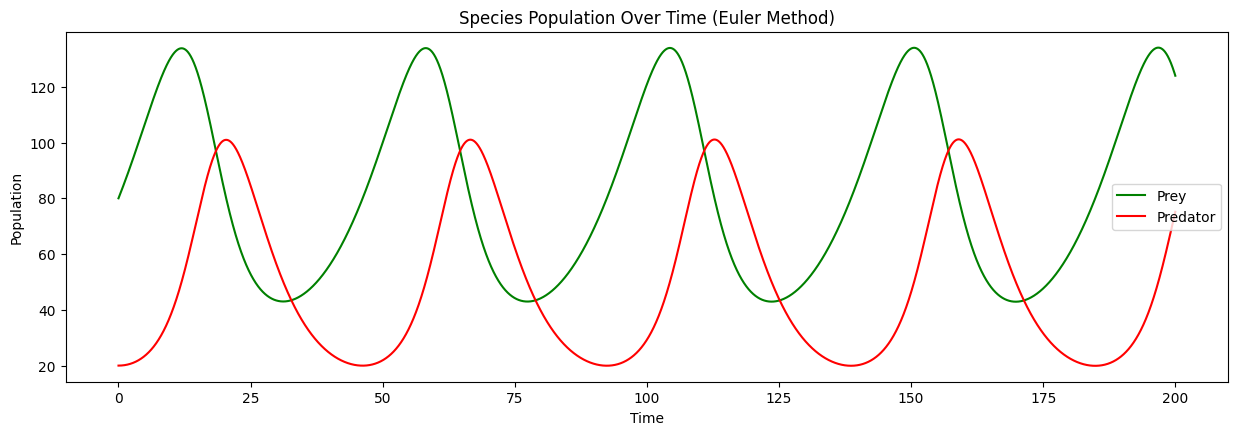

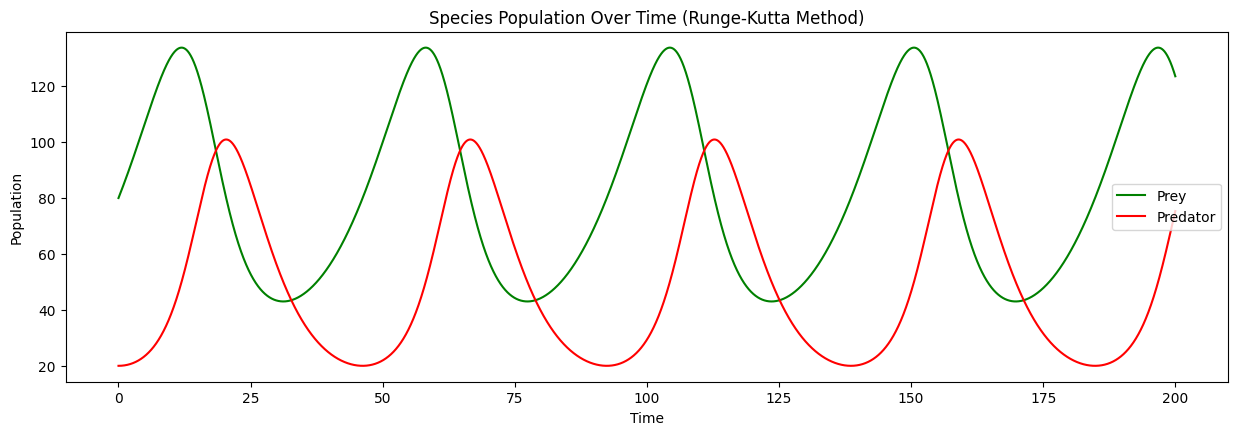

In [7]:
xvals, tvals = Euler(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
Euler_plot = plot1(xvals, tvals)
xvals, tvals = rk4solve(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
Runge_Kutta_plot = plot2(xvals, tvals)

We can see by these two plots the cyclic behaviour of the Lotka-Volterra equations:

* When there are few predator, prey population increases since they are able to reproduce and grow.
* When the prey population increases, the predators 'have more food' and they increase in population by eating the preys.
* When the predator population increases, the prey population decreases leaving less food for the predator population.
* As a consequence the predator population decreases having less food to eat, and the cycle repeats.

## REVISITED LOTKA-VOLTERRA

### First case of analysis: three species (simpler case)

#### Setting up variables and the function

We start setting up 7 parameters: a, b, c, d, e, fi, g. (we set h and i to 0 since we do not need these parameters for now).
In this case we analyze three species: a prey, a middle species and a predator:

* The prey species is a prey of the middle species
* The middle species is both a predator of the prey species and a prey of predator species
* The predator species is a predator of the middle species

As we can see, in this case of anlysis we do not have any direct interaction between prey and predator species but the existence of the middle species is necessary and mediates between them.

We set a starting point x0, where the first index is the starting population of the prey, the second index is the starting population of the middle species and third index is the starting population of the predator.
Moreover we set a starting t0 and a maximum tmax, with stepsize 0.02

In [8]:
#Parameters
a = 0.1
b = 0.002
c = 0.003
d = 0.2
e = 0.001
fi = 0.006
g = 0.4
h = 0
i = 0
#We set our starting points x0 and yo
t0 = 0
x0 = np.array([50, 10, 20])
#We set our tmax and stepsize
tmax = 300
dt = 0.02

Now we define the revisited Lotka-Volterra equations:

In [9]:
def f(x, t0, a, b, c, d, e, fi, g, h, i):
    f0 = x[0] * a - b*x[1]*x[0]
    f1 = x[0]*x[1] * c - x[1] * d - e*x[2]*x[1]
    f2 = fi*x[2]*x[1] - g*x[2]
    #Function ouput is a np.array containing three functions
    fout = np.array([f0, f1, f2])
    return fout

f0 denotes the prey equation:
* a * x [0] denotes the growth rate
* b * x[1] * x[0] denotes the prey being eaten by the middle species

f1 denotes the middle species equation:
* x[1] * c * x[0] denotes the population growth from eating the prey species
* d * x[1] denotes the natural death 
* e * x[2] * x[1] denotes middle species being eaten by the predator species

f2 denotes the predator equation:
* fi * x[2] * x[1] denotes the population growth from eating middle species
* g * x[2] denotes the natural death 

#### Plotting

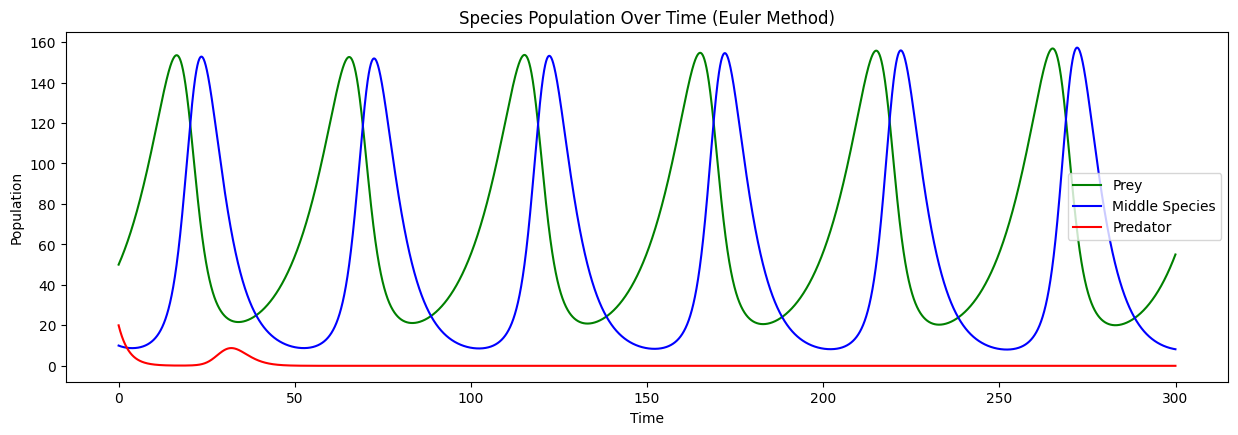

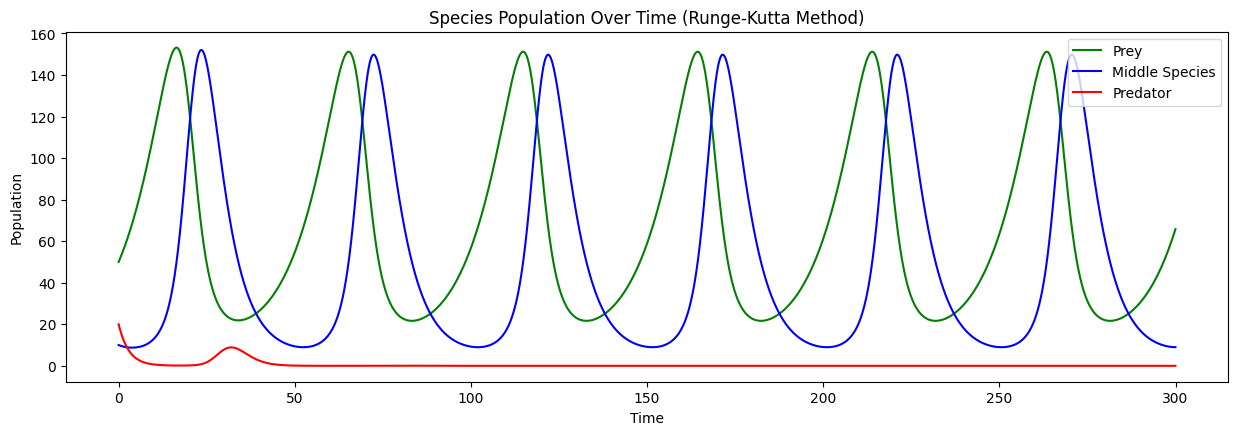

In [10]:
xvals, tvals = Euler(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
Euler_plot = plot1(xvals, tvals)
xvals, tvals = rk4solve(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
Runge_Kutta_plot = plot2(xvals, tvals)

In these plots we can see (due to the choice of the parameters) that the predator species will go extinct. This is due the fact that the death rate of the predator species overcome the population growth from eating middle species.
For this reason, we can try to reduce the death rate of the predator species in order to fix this:

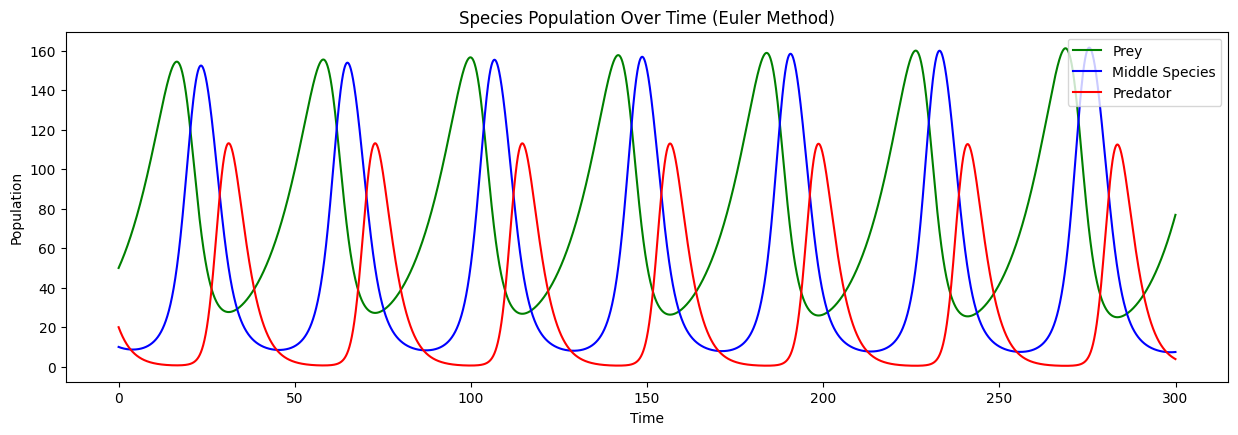

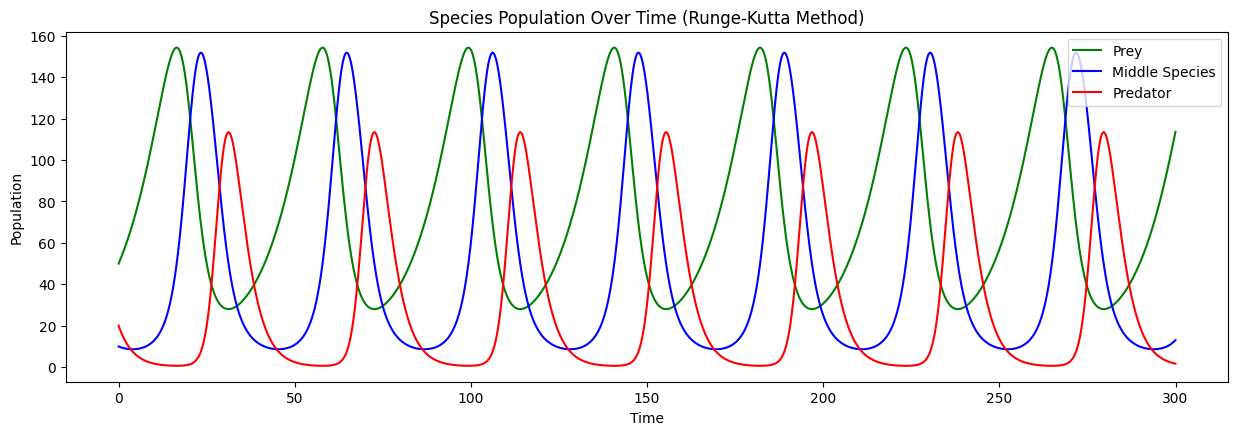

In [11]:
g = 0.3
#old g was 0.4

xvals, tvals = Euler(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
Euler_plot = plot1(xvals, tvals)
xvals, tvals = rk4solve(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
Runge_Kutta_plot = plot2(xvals, tvals)

Only by reducing the death rate of the predator population by 0.1, we have a completely different scenario. Now the predator species will not go extinct but increase and decrease due the cycling behaviour of the Lotka-Volterra equations. 

Moreover, we can try to see what happen if middle species does not exist anymore due to a catastrophic event (setting d (death rate of the middle species) to 50).

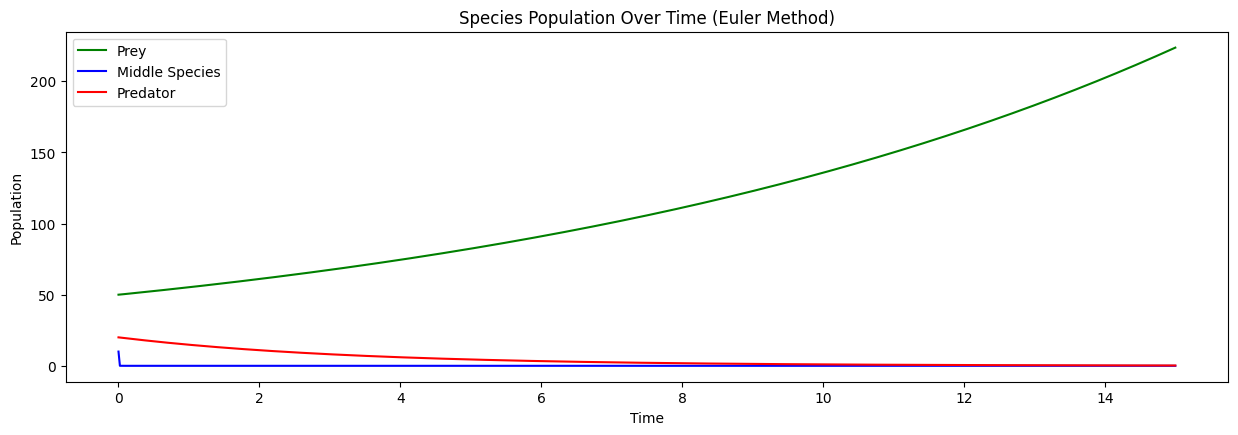

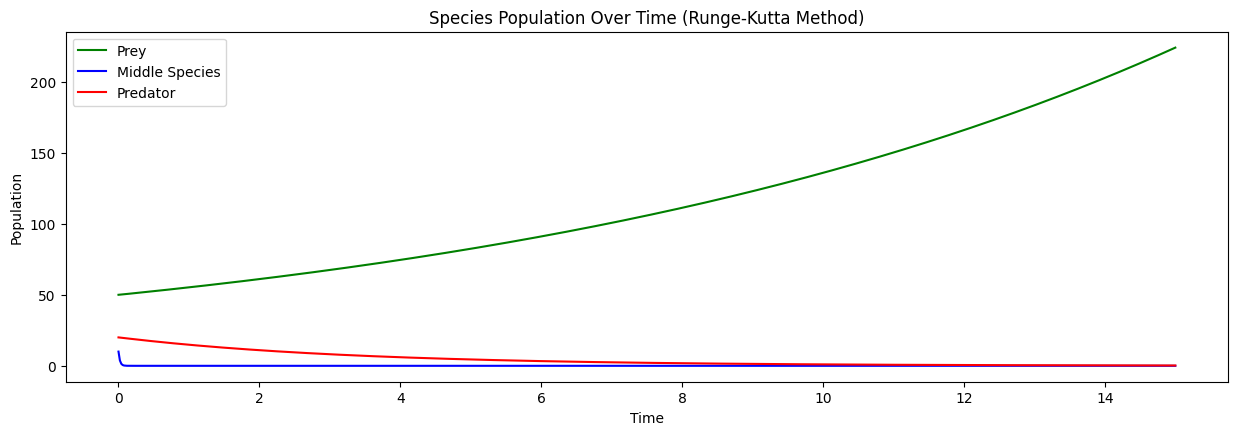

In [12]:
d = 50
#old d was 0.2
tmax = 15
#I have changed also tmax to see more clearly the behaviour of the three species

xvals, tvals = Euler(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
Euler_plot = plot1(xvals, tvals)
xvals, tvals = rk4solve(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
Runge_Kutta_plot = plot2(xvals, tvals)

As we can see by these plots, if middle species population go extinct we have two consequences:

* Prey population will continue to grow since is not being eaten anymore by middle species.
* Predator population will go extinct since cannot eat anymore middle species and will encount only natural death.

### Second case of analysis: three species (generalised model)

#### Setting up variables and the function

In this case of analysis each species can be both a prey or predotor depending on the choice of the parameters:

* negative parameters affect negatively to the species 
* positive paramters affect positevely to the species

In [13]:
#Parameters
a = 0.2    #growth / death rate
b = -0.05
c = -0.05
d = 0.05
e = -0.4    #growth / death rate
fi = -0.03
g = 0.03
h = 0.05
i = -0.4    #growth / death rate
#We set our starting points x0 and yo
t0 = 0
x0 = np.array([40, 20, 10])
#We set our tmax and stepsize
tmax = 200
dt = 0.02

in order to have three species that can be both prey or predator we have to set three ODEs that describe all the possible interactions between each species. We can decide which one is a prey which one is a 'middle species' and which one is a predator by a correct choice of the parameters.

The choice of the parameters has to be reasonable: if we set a negative interaction between species one and species two in the first ODE (that means that species one is eaten by species two), we have to set a positive interaction between species one and species two in the second ODE (that means species two grows by eating species one) in order to be consistent.

In [14]:
def f(x, t0, a, b, c, d, e, fi, g, h, i):
    f0 = x[0] * a + b*x[1]*x[0] + c*x[2]*x[0]
    f1 = x[0]*x[1] * d + x[1] * e + fi*x[2]*x[1]
    f2 = x[2]*x[0] * g + h*x[2]*x[1] + i*x[2]
    #Function ouput is a np.array containing three functions
    fout = np.array([f0, f1, f2])
    return fout

f0 denotes the first species:
* a * x [0] denotes the growth rate since a is positive
* b * x[1] * x[0] denotes the interaction between first species and second species, since b is negative it means that the first species is eaten by the second one.
* c * x[2] * x[0] denotes the interaction between first species and third species, since c is negative it means that the first species is eaten by the third one.

f1 denotes the second species:
* x[1] * d * x[0] denotes the interaction between second species and first species, since d is postive it means that the second species grows by eating the first one.
* e * x[1] denotes the natural death since d is negative
* fi * x[2] * x[1] denotes the interaction between second species and third species, since fi is negative it means that the second species is eaten by the third one.


f2 denotes the third species:
* g * x[2] * x[0] denotes the interaction between third species and first species, since g is postive it means that the third species grows by eating the first one.
* h * x[2] * x[1] denotes the interaction between third species and second species, since h is postive it means that the third species grows by eating the second one.
* i * x[2] denotes the natural death since i is negative

We can conclude that, by the choice of the parameters:

* first species is a prey of BOTH second and third species.
* second species is a predator of the first species but at the same time is a prey of the third species.
* third species is a predator of BOTH first and second species.

Differently from the simpler case that we have analysed before, where we did not have any interaction between species one and species three, in this case each species interact to each other.

#### Plotting

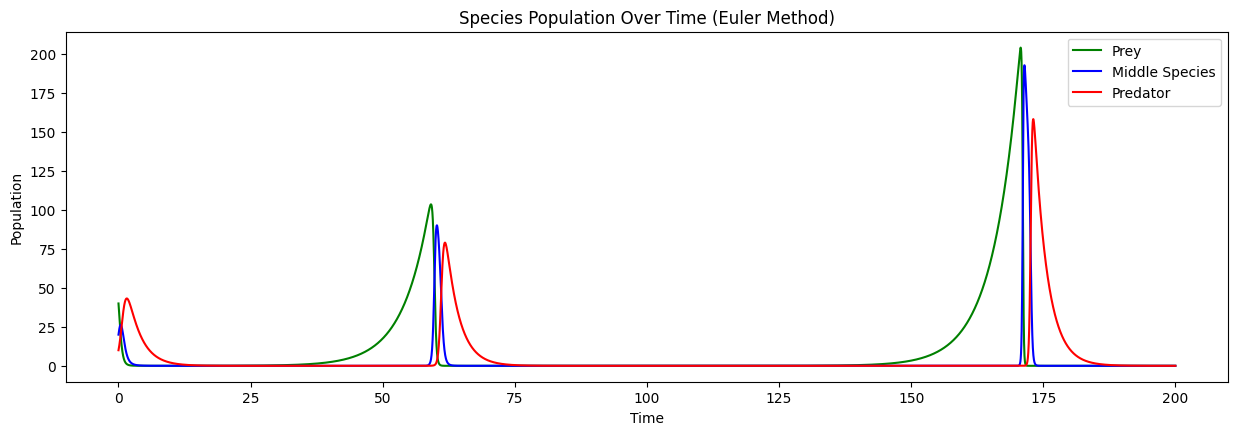

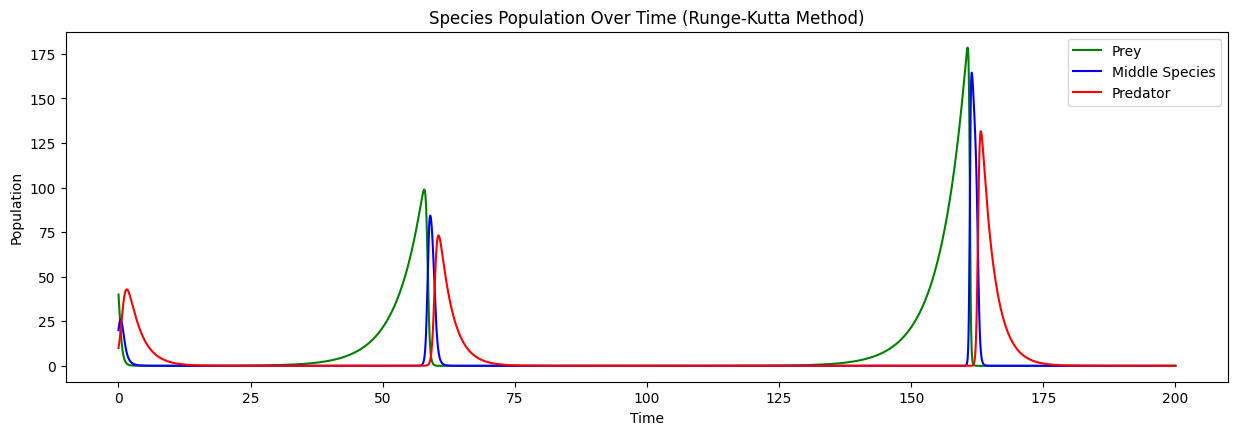

In [15]:
xvals, tvals = Euler(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
Euler_plot = plot1(xvals, tvals)
xvals, tvals = rk4solve(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
Runge_Kutta_plot = plot2(xvals, tvals)

In these plots we can see how three species interact to each other:

* When the prey population increases by natural growth, also the middle species increases by eating the prey population.
* When the middle species increases, also the predator species increases by eating both the prey and the middle species population.
* As a consequence, first of all the prey population decreases as is eaten by both the middle species and the predator population. Secondly, also the middle species population decreases having no more food to eat and beung eaten by the predators. Finally, the predator population decreases as there is 'no food' to eat.

Moreover, we can see how the extinction of the middle species affect the populations of the other species:

We can do this by increasing the death rate of the middle species.

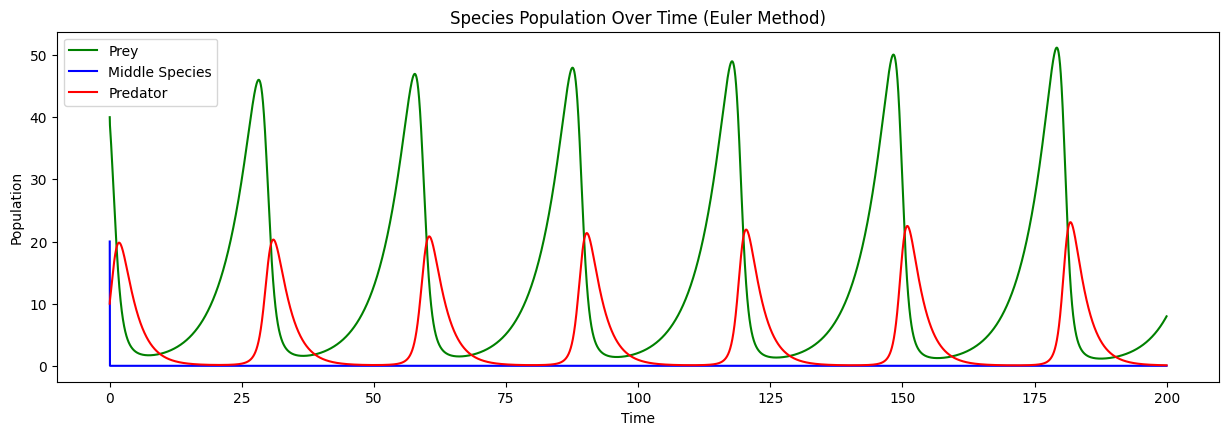

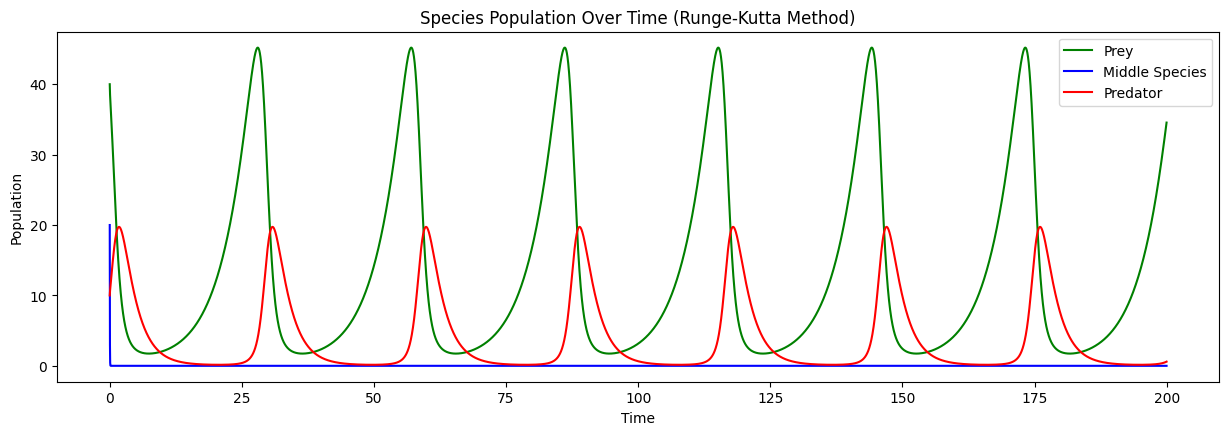

In [16]:
e = -50
xvals, tvals = Euler(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
xplot = plot1(xvals, tvals)
xvals, tvals = rk4solve(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
yplot = plot2(xvals, tvals)

As we can see by these graphs, differently from the previous case that we have analysed, the extinction of the middle species does not imply the extinction of the predator species. The reason is that, in this case, we have interaction between prey and predator.

What will happen if we set the parameters in a way of having three species and each of them is both prey and predator?

#### Setting up variables

In [17]:
#Parameters
a = 0.25    #growth / death rate
b = 0.04
c = -0.02
d = -0.04
e = 0.8    #growth / death rate
fi = 0.03
g = 0.02
h = -0.04
i = -0.5  #growth / death rate
#We set our starting points x0 and yo
t0 = 0
x0 = np.array([50, 20, 5])
#We set our tmax and stepsize
tmax = 60
dt = 0.02

That means:
* species 1 is eaten by species 3 but eats species 2
* species 2 is eaten by species 1 but eats species 3
* species 3 is eaten by species 2 but eats species 1

#### Plotting

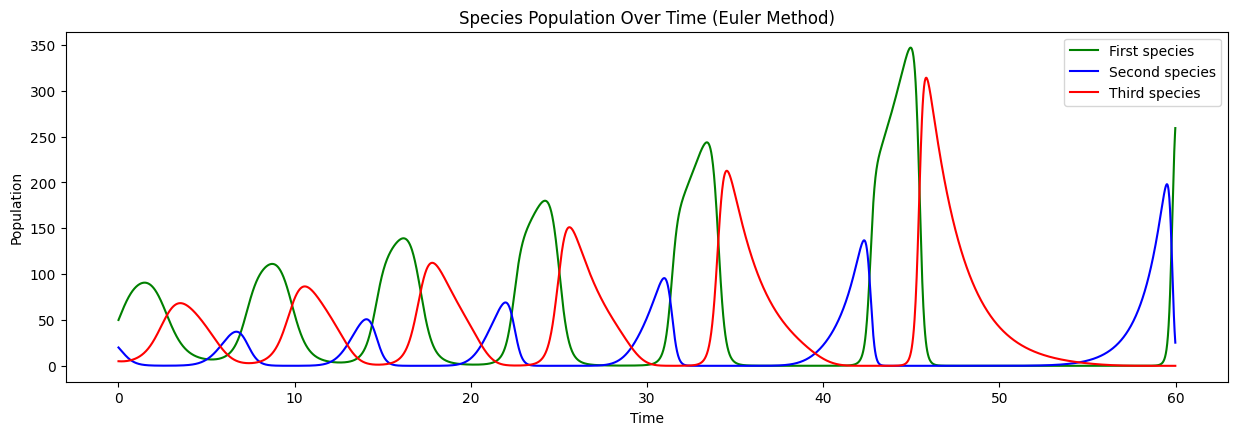

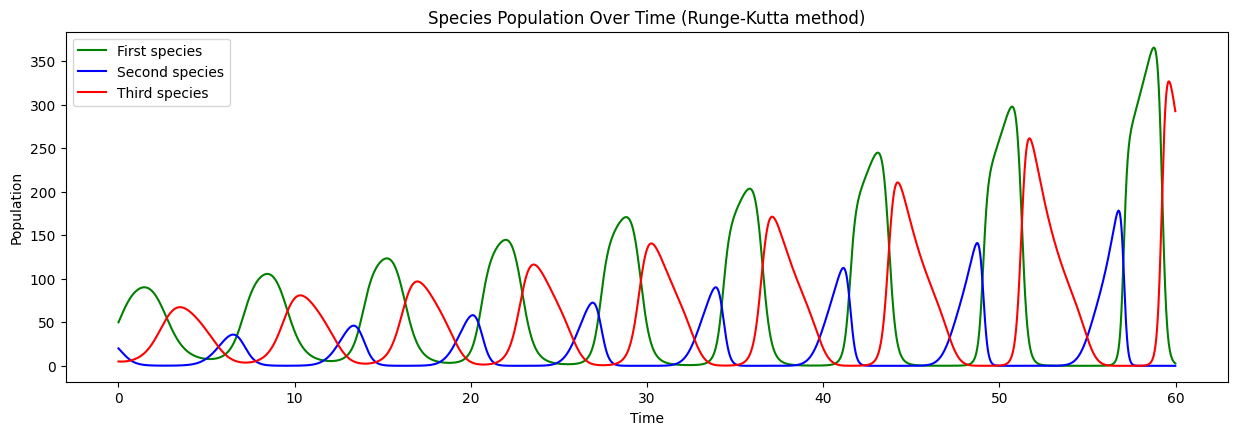

In [18]:
xvals, tvals = Euler(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
Euler_plot = plot1(xvals, tvals, input=False)
xvals, tvals = rk4solve(f, x0, t0, tmax, dt, a, b, c, d, e, fi, g, h, i)
Runge_Kutta_plot = plot2(xvals, tvals, input=False)

In this final case we do not have a prey or a predator but there are three middle species.

The nature of this plot is very different depending on the choice of the parameters since the species are all both prey and predator of each other. Depending on how we choose them, we determine which species is dominant over the others.

In [20]:
import nbconvert

notebook_path = 'Project.ipynb'

exporter = nbconvert.HTMLExporter()

body, resources = exporter.from_filename(notebook_path)

with open('Project.html', 'w') as f:
    f.write(body)

## SOURCES

I have found online a paper from the Department of Mathematics of the Washington University which describes the theory behind the analysis of the Voltka-Volterra equations using three different ODEs (i.e. three different species). I relied on this paper for the ODEs describing the simpler and the generalised model with three species.

https://sites.math.washington.edu/~morrow/336_16/2016papers/lalith.pdf